In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

In [ ]:
data = pd.read_csv('/Users/Sami/Documents/projet/Brief1_primeassurance/cleaneddata.csv')
X = data[['smoker','age', 'is_east', 'sex','bmi', 'is_north']]
y = data['charges']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

<Axes: ylabel='Frequency'>

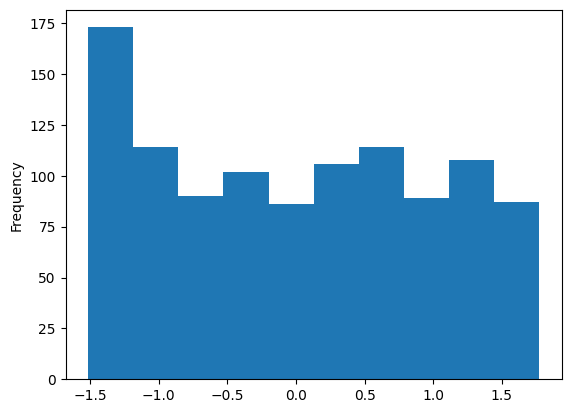

In [4]:
X_train['age'] = (X_train['age'] - X_train['age'].mean())/X_train['age'].std()
X_test['age'] = (X_test['age'] - X_test['age'].mean())/X_test['age'].std()
X_train['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

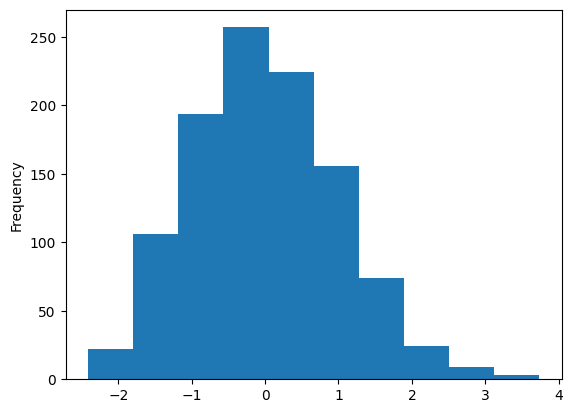

In [5]:
X_train['bmi'] = (X_train['bmi'] - X_train['bmi'].mean())/X_train['bmi'].std()
X_test['bmi'] = (X_test['bmi'] - X_test['bmi'].mean())/X_test['bmi'].std()
X_train['bmi'].plot(kind='hist')

<Axes: ylabel='Frequency'>

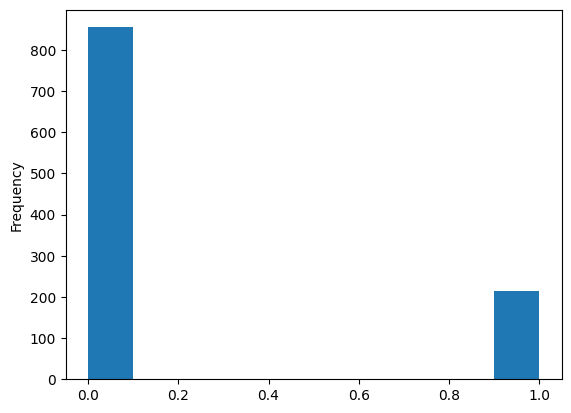

In [6]:
X_train['smoker'].plot(kind='hist')

<Axes: ylabel='Frequency'>

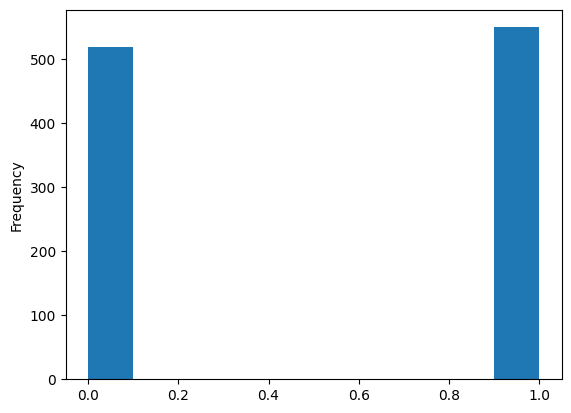

In [7]:
X_train['sex'].plot(kind='hist')

In [8]:
dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(X_train,y_train)
dummy_reg.score(X_test,y_test)

-0.008391982350864469

In [9]:
dummy_reg = DummyRegressor(strategy="median")
dummy_reg.fit(X_train,y_train)
dummy_reg.score(X_test,y_test)

-0.1350649813363225

In [10]:
reg = LinearRegression().fit(X_train,y_train)
y_pred = reg.predict(X_test)

print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.81


In [11]:
clf = linear_model.Lasso(alpha=0.001)
clf.fit(X_train,y_train)
y_pred_lasso = clf.predict(X_test)

print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_lasso))

Coefficient of determination: 0.81


In [12]:
model = linear_model.Lasso()

# test this range of alpha
alpha_range = np.arange(0.001, 2, 0.01)

param = {'alpha':alpha_range}

# score base on r2
grid_search_r2 = GridSearchCV(model,param_grid=param,cv=5)
grid_search_r2.fit(X_train, y_train)

# score base on MAE
grid_search_MAE = GridSearchCV(model,param_grid=param,scoring ='neg_mean_absolute_error',cv=5)
grid_search_MAE.fit(X_train, y_train)

print('Best R2 score   : ', grid_search_r2.best_score_)

Best R2 score   :  0.7227854282324662


In [13]:
clfridge = linear_model.Ridge(alpha=0.01)
clfridge.fit(X_train,y_train)
y_pred_ridge = clfridge.predict(X_test)

print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_ridge))

Coefficient of determination: 0.81


In [14]:
model = linear_model.Ridge()

# test this range of alpha
alpha_range = np.arange(0.001, 2, 0.01)

param = {'alpha':alpha_range}

# score base on r2
grid_search_r2 = GridSearchCV(model,param_grid=param,cv=5)
grid_search_r2.fit(X_train, y_train)

# score base on MAE
grid_search_MAE = GridSearchCV(model,param_grid=param,scoring ='neg_mean_absolute_error',cv=5)
grid_search_MAE.fit(X_train, y_train)

print('Best R2 score   : ', grid_search_r2.best_score_)

Best R2 score   :  0.7228867912424983


In [15]:
clfelastic = linear_model.ElasticNet(alpha=0.001, l1_ratio=0.9)
clfelastic.fit(X_train,y_train)
y_pred_elastic = clfelastic.predict(X_test)

print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_elastic))

Coefficient of determination: 0.80


In [16]:
model = linear_model.ElasticNet()

# test this range of alpha
alpha_range = np.arange(0.001, 2, 0.01)
l1_range = np.arange(0.1,1,0.1)

param = {'alpha':alpha_range, 'l1_ratio': l1_range}

# score base on r2
grid_search_r2 = GridSearchCV(model,param_grid=param,cv=5)
grid_search_r2.fit(X_train, y_train)

# score base on MAE
grid_search_MAE = GridSearchCV(model,param_grid=param,scoring ='neg_mean_absolute_error',cv=5)
grid_search_MAE.fit(X_train, y_train)

print('Best R2 score   : ', grid_search_r2.best_score_)

Best R2 score   :  0.7228859391297375
